<a href="https://colab.research.google.com/github/andrenp2/Sigmoidal_DataScience/blob/main/Analisando_os_Dados_do_Airbnb_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Hawaii, Hawaii, United States*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Hawaii, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [79]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [80]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/hi/hawaii/2021-12-11/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - numero de id gerado para identificar o imovel
* `name` - nome da acomodação anunciada
* `host_id` - numero de id do proprietário do imovel
* `host_name` - nome do proprietario 
* `neighbourhood_group` - coluna sem valor validos
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude do imovel
* `longitude` - coordenada de longitudo do imovel 
* `room_type` - informa o tipo do quarto oferecido
* `price` - preco anunciado pelo imovel 
* `minimum_nights` - minimo de noites para alugar
* `number_of_reviews` - numero de avaliações do quarto
* `last_review` - data da ultima avaliação 
* `reviews_per_month` - avaliações por mês
* `calculated_host_listing_count` - quantidade de imovel do mesmo anfitrião
* `availability_365` - numero de dias de disponibilidade dentro de 365 dias
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [81]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,149,3,16,2021-10-23,0.12,2,193,6,119-269-5808-01R
1,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,85,5,186,2021-11-25,1.29,2,253,18,NaN
2,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56604,-155.96199,Entire home/apt,299,6,32,2021-09-25,0.33,2,189,12,NaN
3,5434,Kauai Ocean View 3 Story Tiki Tower Princeville,7984,Ahlea,Kauai,North Shore Kauai,22.22080,-159.46989,Entire home/apt,425,2,134,2021-11-27,0.90,2,231,26,540050300023
4,5930,Poipu Beach Guest House - Orchid - SurfSong,10768,John,Kauai,Koloa-Poipu,21.88139,-159.47248,Private room,140,3,206,2021-12-01,1.54,4,120,27,260060100000


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [82]:
# identificar o volume de dados do DataFrame
print("Numero de linhas do dataset : {}".format(df.shape[0]))
print("Numero de colunas do dataset : {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Numero de linhas do dataset : 24294
Numero de colunas do dataset : 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [83]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.228204
reviews_per_month                 0.204330
last_review                       0.204330
host_name                         0.005392
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

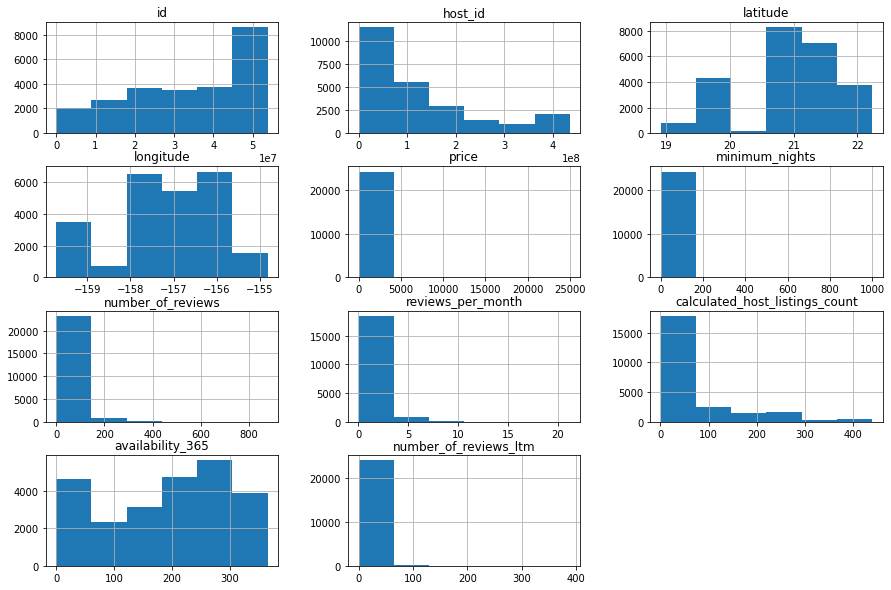

In [85]:
# plotar o histograma das variáveis numéricas

df.hist(bins = 6, figsize =(15,10));

### **Q.3.1 Verificando outliers**

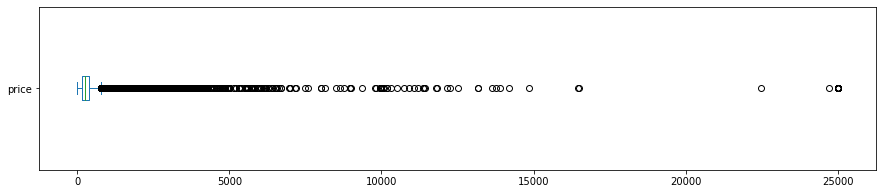

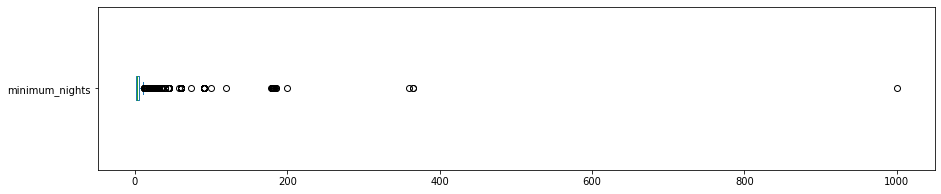

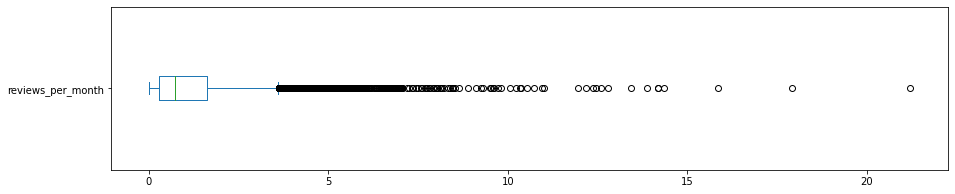

In [109]:
# verificando as colunas price, minimum_nights, number_of_reviews
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))
plt.show()


In [110]:
# Verificando em numeros, o objetivo é encontrar um limite de exclusao dos dados para cada coluna, price, minimum_nights.
preco_lim = 4000
noite_lim = 31

# ---- PRICE ----
print("\nprice: preço acima de USD $ {}".format(preco_lim))
print("{} entradas".format(len(df[df.price > preco_lim])))
print("{:.4f}%".format(len(df[df.price > preco_lim])/df.shape[0]*100))

# --- MINIMUM_NIGHTS ---
print("\nminimum_nights: minimo de noites acima de {} dias".format(noite_lim))
print("{} entradas".format(len(df[df.minimum_nights > noite_lim])))
print("{:.4f}%".format(len(df[df.minimum_nights > noite_lim]) / df.shape[0] * 100))


price: preço acima de USD $ 4000
219 entradas
0.9015%

minimum_nights: minimo de noites acima de 31 dias
188 entradas
0.7739%


 ### **Q3.2. Tratando outliers**

** Fazendo a analise acima podemos notar alguns pontos interessantes referente aos outliers, tais como: **

*   temos apenas `219` entradas `acima de 4000 US$`, o que representa menos que `1%` do nosso dataset
*   da coluna minimum_nights, `188 acomodações` exigem um periodo maior que `31` dias para locação, representando menos que `1%` do dataset.

Sendo assim, podemos filtrar esses dados da nossa analise, pois nao representara uma mudança significativa, e a analise ficará mais coerente sem a presença de tantos *`outliers`*



In [111]:
# criando uma copia do df
df_clean = df.copy()

** podemos fazer um filtro nesse 'novo' dataset para retirar os valores conforme analisados anteriormente. **

In [112]:
# retirando os dados da coluna price 
df_clean.drop(df_clean[df_clean.price > preco_lim].index, axis=0, inplace=True)

# retirando os dados da coluna minimum_price
df_clean.drop(df_clean[df_clean.minimum_nights > noite_lim].index, axis=0, inplace=True)

# excluindo a coluna neighbourhood_group pois nao contem valores
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

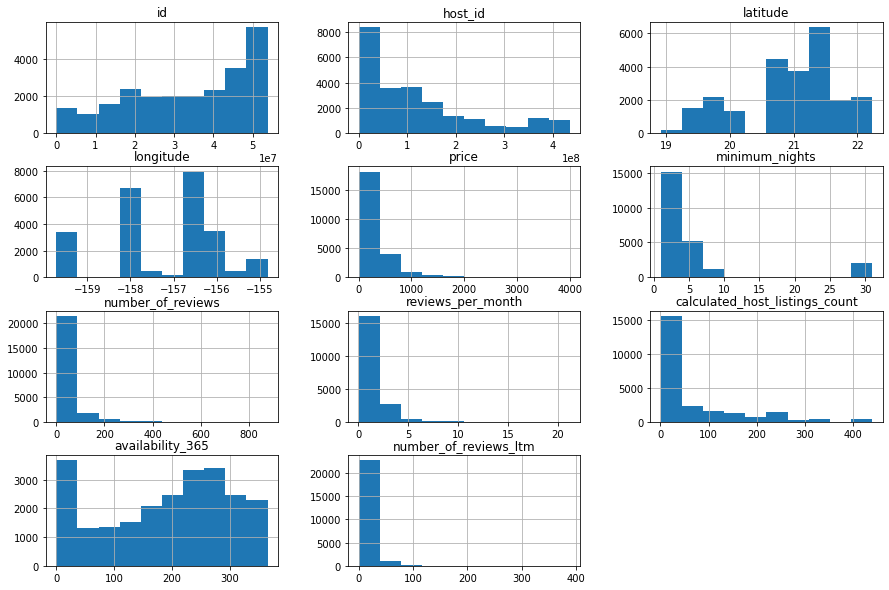

In [113]:
# plotando os histogramas sem os outliers presentes

df_clean.hist(bins=10, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [116]:
# ver a média da coluna `price``

media_preco_co = df['price'].mean()
media_preco_so = df_clean['price'].mean()

print('A media dos alugueis na cidade é de : $ {:.2f} com os outliers'.format(media_preco_co))
print('\nA media dos alugueis na cidade é de : $ {:.2f} sem os outliers'.format(media_preco_so))


A media dos alugueis na cidade é de : $ 447.32 com os outliers

A media dos alugueis na cidade é de : $ 358.66 sem os outliers


### **Q4. Qual a correlação existente entre as variáveis**

In [117]:
# criar uma matriz de correlação
#escolher as variaveis mais importantes para analisar se existe uma correlação entre elas

corr = df_clean[['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.070763,-0.191534,-0.224260,0.109707,-0.025220
minimum_nights,-0.070763,1.000000,-0.050594,-0.169336,-0.120148,-0.026736
number_of_reviews,-0.191534,-0.050594,1.000000,0.632066,-0.251775,0.010021
reviews_per_month,-0.224260,-0.169336,0.632066,1.000000,-0.262667,-0.006019
calculated_host_listings_count,0.109707,-0.120148,-0.251775,-0.262667,1.000000,0.198006
availability_365,-0.025220,-0.026736,0.010021,-0.006019,0.198006,1.000000


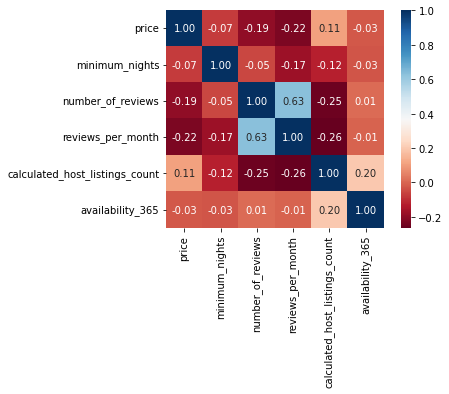

In [118]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white',annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [119]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    21588
Private room        2184
Hotel room            82
Shared room           35
Name: room_type, dtype: int64

In [120]:
# mostrar a porcentagem de cada tipo de imóvel disponível
( df_clean.room_type.value_counts() / df_clean.shape[0] )

Entire home/apt    0.903680
Private room       0.091423
Hotel room         0.003433
Shared room        0.001465
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [121]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
East Honolulu            532.447059
Lahaina                  525.918735
Koolaupoko               516.154762
South Kohala             513.095772
Koloa-Poipu              497.834028
Ewa                      461.688073
Waimea-Kekaha            445.869565
Lihue                    430.101382
Koolauloa                421.651064
North Shore Kauai        388.401355
Kihei-Makena             386.972296
Paia-Haiku               367.180905
Hana                     361.197183
Lanai                    360.857143
North Shore Oahu         330.428986
Makawao-Pukalani-Kula    303.419355
North Kohala             302.083333
Kapaa-Wailua             301.867110
North Kona               288.168211
North Hilo               254.628571
Wailuku-Kahului          235.478261
South Kona               222.574380
Waianae                  221.706422
Primary Urban Center     218.379754
Hamakua                  217.133333
Kau                      205.124324
South Hilo               173.462916
Central Oahu  

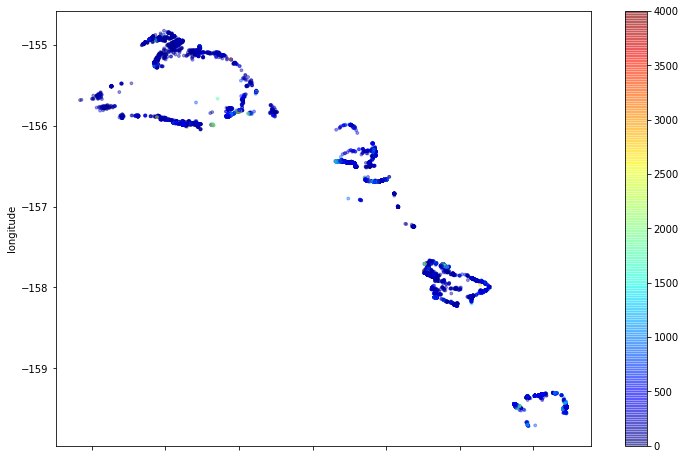

In [122]:
# plotar os imóveis pela latitude-longitude
df_clean.plot.scatter(x='latitude',y='longitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [127]:
# ver a média da coluna `minimum_nights``

print("A media do numero minimo de noites para locação é de {:.1f} noites".format(df_clean.minimum_nights.mean()))


A media do numero minimo de noites para locação é de 5.3 noites


## Conclusões


#### Foi analisado os dados de alugueis do Airbnb para a cidade de Hawaii. 

Durante a analise notou-se a presença de outliers, sendo assim, foi realizado um filtro manual, retirando dados que fosse superior a um determinado valor, os quais esses nao correspondessem mais que 1% de todo o dataset para que isso nao alterasse nossa analise final.

**Temos apenas `219` entradas `acima de 4000 US$`, o que representa menos que `1%` do nosso dataset e sobre a coluna minimum_nights, `188 acomodações` exigem um periodo maior que `31` dias para locação, representando também menos que `1%` do dataset.**

Sendo assim, sua exclusão se torna a melhor alternativa.

Foi comparado a media dos preços com e sem outliers, que resultou em:

**- A media dos alugueis na cidade é de : $ 447.32 `com` os outliers**

**- A media dos alugueis na cidade é de : $ 358.66 `sem` os outliers**

**Obs: nota-se que os *`outliers`* intereferem diretamente nos valores do dataset, principalmente quando analisamos as médias**


Porém, apesar de retirar alguns *outliers*, ainda há uma discrepancia nos dados, por nao ter sido utilizado uma abordagem estatística durante a exclusão dos mesmos. Contudo, o objetivo desse projeto era retratar as localidades de maiores custos da cidade de Hawaii no Airbnb, onde ja foi possível obter algumas informações interessantes. 

Contudo, o presente projeto tem como prioridade servir como um estudo para analise de dados, sendo esse o primeiro realizado durante o curso de `Data Science Na Pratica - DSNP 3.0` 